# Construcción del Dataset de migrantes de Al Mashriq a la Argentina

+ Revisando archivos de la bd, concatenando y haciendo algo de limpieza

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#origen de datos

df1 = pd.read_excel("data-o/arch1.xlsx")
df2 = pd.read_excel("data-o/arch2.xlsx")
df3 = pd.read_excel("data-o/arch3.xlsx")
df4 = pd.read_excel("data-o/arch4.xlsx")

In [3]:
print("df1: {}".format(len(df1)))
print("df2: {}".format(len(df2)))
print("df3: {}".format(len(df3)))
print("df4: {}".format(len(df4)))
print("========================")
print("Total registros: {}".format(len(df1) + len(df2) + len(df3) + len(df4)))


df1: 45296
df2: 9346
df3: 13815
df4: 85802
Total registros: 154259


## Procesando fechas antes de concatenar

Antes de concatenar los df para crear la primera versión del dataset es necesario estar seguros de que la columna fecha en cada uno contiene una fecha. 

Como se puede ver en la siguiente celda, los dataframes df3 y df4 contienen en la columna "FECLLE" algunas datos de tipo string con formato AA/MM/DD. 

Para eso se crea una funcion que comprueba si el dato es una fecha y si no lo es lo convierte. 

In [4]:
# revisando formatos de fecha en cada df
from datetime import datetime
#df1['FECLLE']
#df2['FECLLE']
#df3['FECLLE']
#df4['FECLLE']


In [5]:

def convertir_a_fecha(fecha):
    if type(fecha) != datetime and type(fecha) != pd.Timestamp:
        components = fecha.split("/")
        try:
            return pd.Timestamp(int(components[2]), int(components[1]), int(components[0]), 0, 0, 0)  
        except Exception as e:
            print(e)
            print(fecha)
    return fecha
                        
df3['FECLLE'] = list(map(convertir_a_fecha, df3['FECLLE']))
df4['FECLLE'] = list(map(convertir_a_fecha, df4['FECLLE']))


Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/1492
Out of bounds nanosecond timestamp: 1492-09-22 00:00:00
22/09/

Tenemos un conjunto de registros con fechas que causan un integer overflow dado que usamos enteros de 64 bits. 

El rango de fechas representable en pandas es: 

In [6]:
print("Fecha mínima representable: {}".format(pd.Timestamp.min))
print("Fecha máxima representable: {}".format(pd.Timestamp.max))

Fecha mínima representable: 1677-09-21 00:12:43.145225
Fecha máxima representable: 2262-04-11 23:47:16.854775807


Sin embargo esto es un error evidente de carga en la base de datos del CEMLA dado que desde ya en 1492 no solo no existía la Dirección Nacional de Migraciones sino que ni siquiera existía la Argentina.

Buscamos los índices de los registros con esas fechas y los mostramos a ver qué in formación contienen.

In [7]:
index = 0
for fecha in df4['FECLLE']:
    if fecha == '22/09/1492':
        print("{}:    {}".format(index, fecha))
    index += 1

23171:    22/09/1492
23172:    22/09/1492
23173:    22/09/1492
23174:    22/09/1492
23175:    22/09/1492
23176:    22/09/1492
23177:    22/09/1492
23178:    22/09/1492
23179:    22/09/1492
23180:    22/09/1492
23181:    22/09/1492
23182:    22/09/1492
23183:    22/09/1492
23184:    22/09/1492
23185:    22/09/1492
23186:    22/09/1492
23187:    22/09/1492
23188:    22/09/1492
23189:    22/09/1492
23190:    22/09/1492
23191:    22/09/1492
23192:    22/09/1492
23193:    22/09/1492
23194:    22/09/1492
23195:    22/09/1492


In [8]:
print("Total de registros con fecha erronea: {}".format(len(df4[23171:23195])))
df4[23171:23195]

Total de registros con fecha erronea: 24


,NOMBRE VAPOR,APELLI,NOMBRE,NACION,PUERTO.descri,EDAD,SEXO,ESTCIV,RELIGI.descri,INSTRU,FECLLE,PROFES,DESEMBARQ,LUGNAC
23171,PLATA,ANTAR,EZZA,58,MARSELLA,44.0,M,C,CATOLICA,S,22/09/1492,OUVRIER,100,DESCONOCIDO
23172,PLATA,ANTAR,BANNOUB,58,MARSELLA,28.0,F,C,CATOLICA,S,22/09/1492,OUVRIER,100,DESCONOCIDO
23173,PLATA,ANTAR,SELIM,58,MARSELLA,10.0,M,S,CATOLICA,S,22/09/1492,DESCONOCIDA,100,DESCONOCIDO
23174,PLATA,ANTAR,JOUSEF,58,MARSELLA,5.0,M,S,CATOLICA,X,22/09/1492,DESCONOCIDA,100,DESCONOCIDO
23175,PLATA,ANTAR,RHAHMO,58,MARSELLA,1.0,M,S,CATOLICA,X,22/09/1492,DESCONOCIDA,100,DESCONOCIDO
23176,PLATA,JAHNI,MERIAN,53,MARSELLA,23.0,F,S,CATOLICA,S,22/09/1492,JORNALERO,100,DESCONOCIDO
23177,PLATA,SEVY,JUDITH,53,MARSELLA,25.0,F,S,CATOLICA,S,22/09/1492,JORNALERO,100,DESCONOCIDO
23178,PLATA,SEVY,ESTHER,53,MARSELLA,26.0,F,S,CATOLICA,S,22/09/1492,SIN PROFESION,100,DESCONOCIDO
23179,PLATA,COHEN,JACQUES,53,MARSELLA,19.0,M,S,CATOLICA,S,22/09/1492,OUVRIER,100,DESCONOCIDO
23180,PLATA,COHEN,HAIN,53,MARSELLA,17.0,M,S,CATOLICA,S,22/09/1492,OUVRIER,100,DESCONOCIDO


Los 24 registros se corresponden con migrantes registrados bajo las nacionalidaes Otomana (cod 53) y Siria (cod 58). Dos nacionalidades que nos interesan dado que muchos Palestinos han sido registrados bajo las mismas. 

Por otro lado el lugar de nacimiento, que se utilizará para encontrar palestinos registrados bajo otras categorías etno-nacionales es desconocido. 

Por lo pronto decidimos excluir estos registros del dataframe ya que podremos volver sobre ellos de ser necesario conservándolos en los archivos originales. 

In [9]:
df4 = df4.drop(df4.index[23171:23196])

len(df4) + 24


85801

In [10]:
# Comprobamos que todos los df tienen fechas en la columna "FECLLE" 

#any(type(fecha) == pd.Timestamp or type(fecha) == datetime for fecha in df1['FECLLE'])
#any(type(fecha) == pd.Timestamp or type(fecha) == datetime for fecha in df2['FECLLE'])
#any(type(fecha) == pd.Timestamp or type(fecha) == datetime for fecha in df3['FECLLE'])
any(type(fecha) == pd.Timestamp for fecha in df4['FECLLE'])
df4
#for fecha in df4['FECLLE']:
#    if type(fecha) != datetime:
#        print(fecha)

        
#df4[(df4['FECLLE'] > '1898-10-26') & (df4['FECLLE'] < '06-07-1899')]
#df3.columns




,NOMBRE VAPOR,APELLI,NOMBRE,NACION,PUERTO.descri,EDAD,SEXO,ESTCIV,RELIGI.descri,INSTRU,FECLLE,PROFES,DESEMBARQ,LUGNAC
0,MONTEVIDEO,SCIFRIZ,C. JULIUS,Asiatica,GENOVA,18.0,M,S,CATOLICA,S,1893-11-25 00:00:00,AGRICULTOR,100,DESCONOCIDO
1,PARANA,DAVID,ANTOINE,51,HAVRE,20.0,M,C,CATOLICA,S,1883-06-26 00:00:00,COMERCIO,100,DESCONOCIDO
2,PARANA,DAVID,MICHEL,51,HAVRE,11.0,M,S,CATOLICA,S,1883-06-27 00:00:00,COMERCIO,100,DESCONOCIDO
3,PARANA,BARECK,DEIK,51,HAVRE,35.0,M,C,CATOLICA,S,1883-06-28 00:00:00,COMERCIO,100,DESCONOCIDO
4,PARANA,DAVID,JEAN,51,HAVRE,28.0,M,C,CATOLICA,S,1883-06-29 00:00:00,COMERCIO,100,DESCONOCIDO
5,VASARI,NEUCL,DAVID,51,NUEVA YORK,38.0,M,C,PROTESTANTE,S,1910-09-14 00:00:00,TAILOR,100,DESCONOCIDO
6,VASARI,NEUCL,LENA,51,NUEVA YORK,37.0,F,C,PROTESTANTE,S,1910-09-14 00:00:00,TAILOR,100,DESCONOCIDO
7,CAP. ARCONA,WARNECHE,ANNA,51,HAMBURGO,23.0,F,S,CATOLICA,S,1911-10-05 00:00:00,DESCONOCIDA,100,DESCONOCIDO
8,CAP. ARCONA,BENTH,MARIA,51,HAMBURGO,36.0,F,C,CATOLICA,S,1911-10-05 00:00:00,DESCONOCIDA,100,DESCONOCIDO
9,CAP. ARCONA,BENTH,HERMINE,51,HAMBURGO,14.0,F,S,CATOLICA,S,1911-10-05 00:00:00,DESCONOCIDA,100,DESCONOCIDO


In [11]:
#concatenando dataframes
frames = [df1, df2, df3, df4]
result = pd.concat(frames)

In [12]:
result.count()

APELLI           154234
DESEMBARQ        154234
EDAD             154114
ESTCIV           154234
FECLLE           153865
INSTRU           154219
LUGNAC           129340
NACION           154234
NOMBRE           154234
NOMBRE VAPOR     154234
PROFES           149703
PUERTO.descri     99592
PUERTO_descri     54642
RELIGI.descri     99592
RELIGI_descri     54642
SEXO             154234
id_inm            45296
dtype: int64

In [13]:
#Dataset v1
result.to_excel("data-n/dataset-migrantes-al-mashriq.xlsx")

In [14]:
#revisando trabajo con fechas 

#result['FECLLE'] = pd.to_datetime(result['FECLLE'])


#result[result['FECLLE']=='31/12/9999']

index = 0
contador = 0
for fecha in result['FECLLE']:
    if type(fecha) != pd.Timestamp and type(fecha) != datetime:
        print("{}:    {}".format(index, fecha))
        contador += 1
    index += 1

print(contador)

#formato = "%Y-%m-%d"
#result[datetime(result['FECLLE']) < datetime.strptime('1906-11-17', formato)]

#result_fecha = result.set_index('FECLLE')
#result_fecha.iloc['1906-11-17 00:00:00']
#filtrado = result[(result['FECLLE'] > datetime(1906, 11, 17, 0, 0, 0)) 
#                 & (result['FECLLE'] < datetime(1909, 10, 9, 0, 0, 0))]
#filtrado

#mask = (result['FECLLE'] > datetime(1906, 11, 17, 0, 0, 0)) & (result['FECLLE'] < datetime(1909, 10, 9, 0, 0, 0))

#print(result.loc[mask])
#start_time = datetime(1906, 11, 17, 0, 0, 0)
#end_time = datetime(1909, 10, 9, 0, 0, 0)
#print(result_fecha.between_time(start_time=start_time, end_time=end_time))

#result_fecha.loc['1905-11-27':'1909-10-9']

#df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

#df.ix['2014-01-01':'2014-02-01']

#result[result['FECLLE'] > datetime(1906, 11, 17, 0, 0, 0)]


13407:    NaT
45296:    NaT
45297:    NaT
45298:    NaT
45299:    NaT
45300:    NaT
45301:    NaT
45302:    NaT
45303:    NaT
45304:    NaT
45305:    NaT
45306:    NaT
45307:    NaT
45308:    NaT
45309:    NaT
45310:    NaT
45311:    NaT
45312:    NaT
45313:    NaT
45314:    NaT
45315:    NaT
45316:    NaT
45317:    NaT
45318:    NaT
45319:    NaT
45320:    NaT
45321:    NaT
45322:    NaT
45323:    NaT
45324:    NaT
45325:    NaT
45326:    NaT
45327:    NaT
45328:    NaT
45329:    NaT
45330:    NaT
45331:    NaT
45332:    NaT
45333:    NaT
45334:    NaT
45335:    NaT
45336:    NaT
45337:    NaT
45338:    NaT
45339:    NaT
45340:    NaT
45341:    NaT
45342:    NaT
45343:    NaT
45344:    NaT
45345:    NaT
45346:    NaT
45347:    NaT
45348:    NaT
45349:    NaT
45350:    NaT
45351:    NaT
45352:    NaT
45353:    NaT
45354:    NaT
45355:    NaT
45356:    NaT
45357:    NaT
45358:    NaT
45359:    NaT
45360:    NaT
45361:    NaT
45362:    NaT
45363:    NaT
45364:    NaT
45365:    NaT
45366:

In [15]:
#result[13407]['FECLLE'] = pd.Timestamp(1981, 2, 26, 0, 0, 0)
result[13407:13408][['NOMBRE', 'APELLI', 'FECLLE', 'NOMBRE VAPOR']]
result[13407:1]

,APELLI,DESEMBARQ,EDAD,ESTCIV,FECLLE,INSTRU,LUGNAC,NACION,NOMBRE,NOMBRE VAPOR,PROFES,PUERTO.descri,PUERTO_descri,RELIGI.descri,RELIGI_descri,SEXO,id_inm


In [16]:
result[45296:45643] # transjordanos

#result[result["NACION"]==151]

,APELLI,DESEMBARQ,EDAD,ESTCIV,FECLLE,INSTRU,LUGNAC,NACION,NOMBRE,NOMBRE VAPOR,PROFES,PUERTO.descri,PUERTO_descri,RELIGI.descri,RELIGI_descri,SEXO,id_inm
0,JASBECK,100,45.0,C,NaT,S,DESCONOCIDO,57,JEORGES,CANTON,SIN PROFESION,NaN,MARSELLA,NaN,CATOLICA,M,NaN
1,KIRKO,100,36.0,C,NaT,S,DESCONOCIDO,57,MICHEL,CANTON,SIN PROFESION,NaN,MARSELLA,NaN,CATOLICA,M,NaN
2,MALSA,100,38.0,C,NaT,S,DESCONOCIDO,57,MOISES,ANTONIO LOPEZ,COMERCIO,NaN,CADIZ,NaN,MAHOMETANA,M,NaN
3,LACHUND,100,14.0,S,NaT,S,DESCONOCIDO,49,GEORG,WITTEKIND,JORNALERO,NaN,BREMEN,NaN,PROTESTANTE,M,NaN
4,LACHUND,100,16.0,S,NaT,S,DESCONOCIDO,49,HENRICH,WITTEKIND,JORNALERO,NaN,BREMEN,NaN,PROTESTANTE,M,NaN
5,ROSANOS,100,48.0,S,NaT,D,DESCONOCIDO,49,ADOL,AQUITAINE,ILEGIBLE,NaN,MARSELLA,NaN,CATOLICA,M,NaN
6,ESPINAH,100,34.0,C,NaT,N,DESCONOCIDO,57,ABER,DANUBE,SASTRE,NaN,RIO DE JANEIRO,NaN,VARIOS,M,NaN
7,RILO,100,45.0,S,NaT,S,DESCONOCIDO,72,SALOMON,CATALU?A,SU CASA,NaN,CADIZ,NaN,CATOLICA,M,NaN
8,BENAIN,100,48.0,V,NaT,S,DESCONOCIDO,72,FREIJA,CATALU?A,SU CASA,NaN,CADIZ,NaN,CATOLICA,F,NaN
9,BENAIN,100,17.0,S,NaT,S,DESCONOCIDO,72,FREIJA,CATALU?A,SU CASA,NaN,CADIZ,NaN,CATOLICA,F,NaN


In [17]:
nacionalidades = result["NACION"]

In [18]:
nacionalidades.count()

154234

In [19]:
dicNaciones = {'26':'26', '57':'HEBREA', '49':'PERSA', '72':'JUDIA', '126':'ISRAELITA', '80':'RUSO HEBREA',
              '128':'LIBANESA', '122':'PERSA ARMENIA', '151':'MUSULMANES', '148':'PALESTINOS', '157':'JERUSALEM',
              '402':'TRANS JORDANA', '1558':'AMMAN', '1556':'JORDANIA', '1659':'RUSO APATRIDA', '30':'ARABE',
              'ARABE SIRIO':'ARABE SIRIO', 'Asiatica':'ASIATICA', '51':'ASIATICA', 'Assirio':'ASSIRIO', '218':'ASSIRIO',
              '24':'TURCA', '141':'TURCO ALBANESA', '103':'TURCO HEBREA', '130':'TURCO-ARABE', '121':'TURCO-ARMENIA',
              '21':'SIRIOLIBANESA', '58':'SIRIO', '67':'LEVANTINA', '53':'OTOMANA', '116':'TURCO-GRECA',
              '125':'TURCO-SERBIA', '131':'TURCO-ROMANA', '140':'TURCO-SIRIA', '133':'TURCO-ASIATICA', '161':' SIRIO FRANCESA'}

In [20]:
dicNaciones

{'103': 'TURCO HEBREA',
 '116': 'TURCO-GRECA',
 '121': 'TURCO-ARMENIA',
 '122': 'PERSA ARMENIA',
 '125': 'TURCO-SERBIA',
 '126': 'ISRAELITA',
 '128': 'LIBANESA',
 '130': 'TURCO-ARABE',
 '131': 'TURCO-ROMANA',
 '133': 'TURCO-ASIATICA',
 '140': 'TURCO-SIRIA',
 '141': 'TURCO ALBANESA',
 '148': 'PALESTINOS',
 '151': 'MUSULMANES',
 '1556': 'JORDANIA',
 '1558': 'AMMAN',
 '157': 'JERUSALEM',
 '161': ' SIRIO FRANCESA',
 '1659': 'RUSO APATRIDA',
 '21': 'SIRIOLIBANESA',
 '218': 'ASSIRIO',
 '24': 'TURCA',
 '26': '26',
 '30': 'ARABE',
 '402': 'TRANS JORDANA',
 '49': 'PERSA',
 '51': 'ASIATICA',
 '53': 'OTOMANA',
 '57': 'HEBREA',
 '58': 'SIRIO',
 '67': 'LEVANTINA',
 '72': 'JUDIA',
 '80': 'RUSO HEBREA',
 'ARABE SIRIO': 'ARABE SIRIO',
 'Asiatica': 'ASIATICA',
 'Assirio': 'ASSIRIO'}

In [21]:
NACIONALIDAD = []
for nacion in nacionalidades:
    if nacion in dicNaciones:
        NACIONALIDAD.append(dicNaciones[nacion])
    elif str(nacion) in dicNaciones:
        NACIONALIDAD.append(dicNaciones[str(nacion)])
    else:
        NACIONALIDAD.append(str(nacion))

In [22]:
result["NACIONALIDAD"] = NACIONALIDAD

In [23]:
migrantes = result

In [24]:
del(migrantes["RELIGI.descri"])

In [25]:
migrantes.to_excel("data-n/migrantes-al-mashriq.xlsx")

In [26]:
migrantes[['NACIONALIDAD','APELLI']].groupby('NACIONALIDAD').count()

,APELLI
NACIONALIDAD,
SIRIO FRANCESA,19
26,45296
AMMAN,8
ARABE,13814
ARABE SIRIO,1
ASIATICA,95
ASSIRIO,5
HEBREA,245
ISRAELITA,981


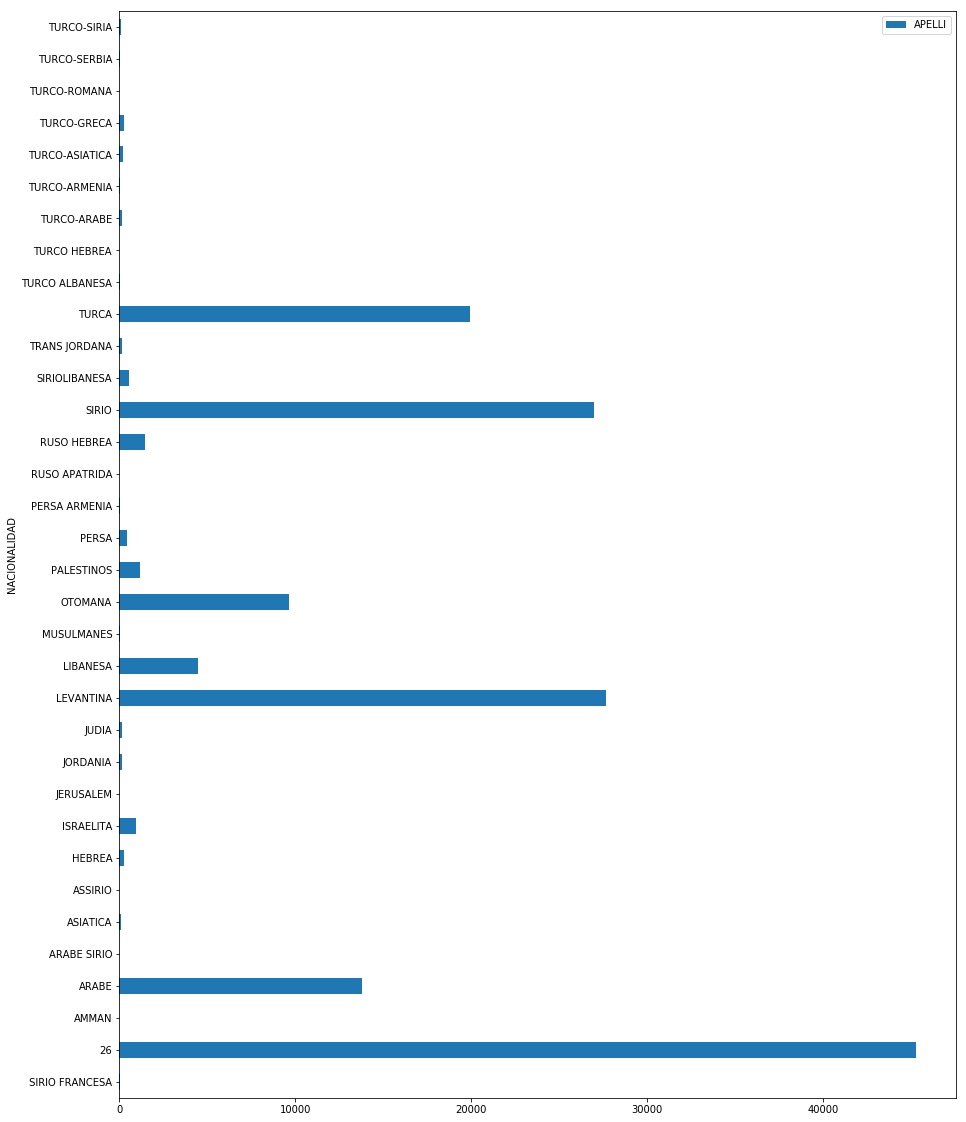

In [27]:
migrantes[['NACIONALIDAD','APELLI']].groupby('NACIONALIDAD').count().plot.barh(figsize=(15,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4D1B2E048>], dtype=object)

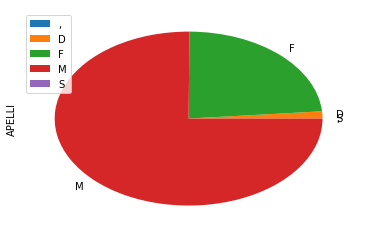

In [28]:
migrantes[['APELLI','SEXO']].groupby('SEXO').count().plot.pie(y=None, subplots=True)

In [29]:
migrantes[['RELIGI_descri','APELLI']].groupby('RELIGI_descri').count()

,APELLI
RELIGI_descri,
ACATOLICA,29
ALAOUITA,30
ANGLICANA,2
ANTIGUA CATOLIC,1
APOLIDE,1
APOSTOLICO,2
ARABE,11
ARM.GREG.,1
ARMENIA,19


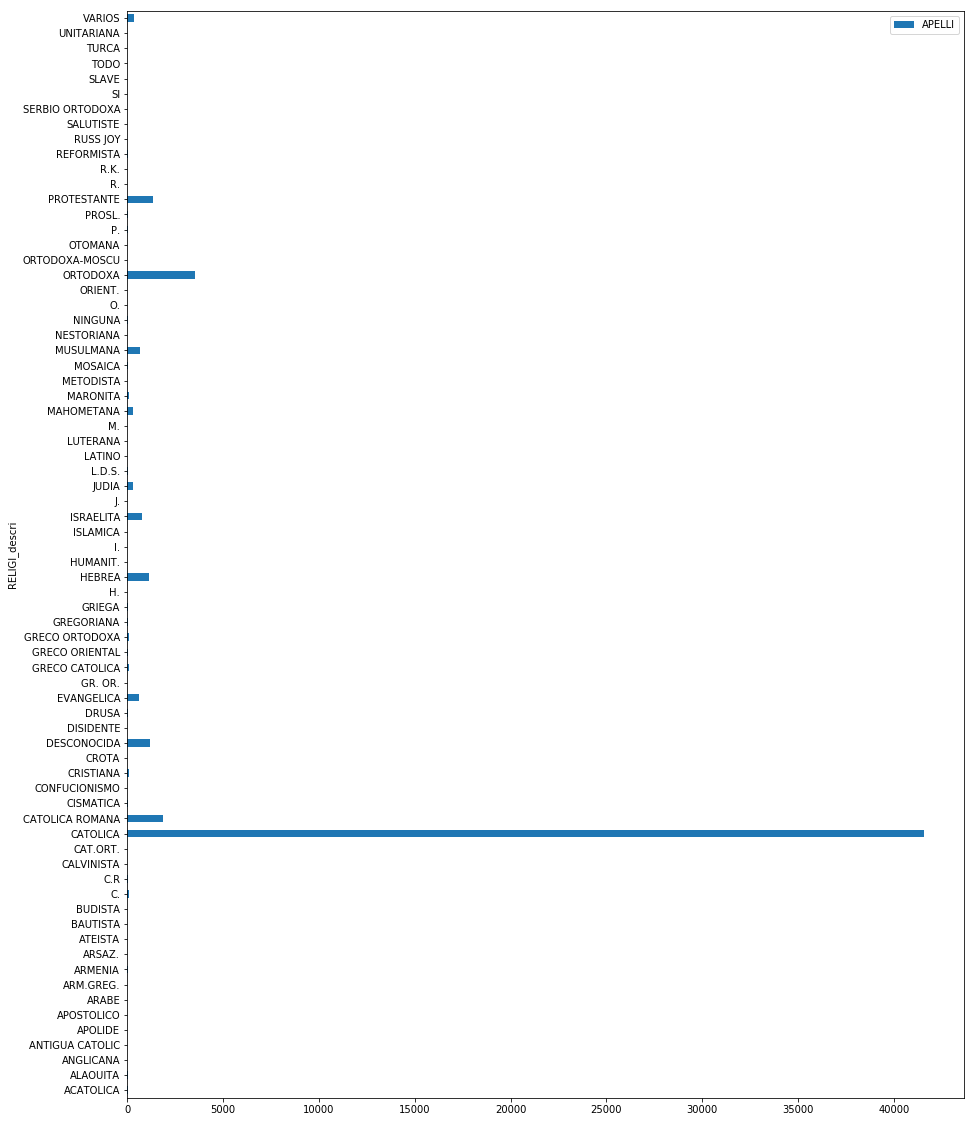

In [30]:
migrantes[['RELIGI_descri','APELLI']].groupby('RELIGI_descri').count().plot.barh(figsize=(15,20))

In [31]:
migrantes[['NOMBRE VAPOR','APELLI']].groupby('NOMBRE VAPOR').count()

,APELLI
NOMBRE VAPOR,
17 DE OCTUBRE,3
A.R. DE GENOUILLY,38
A.S. DE LAMORNAIX,68
AACHEN,27
ABIE,19
ACRE,4
ADRIANA,7
AELO,3
AEOLUS,5


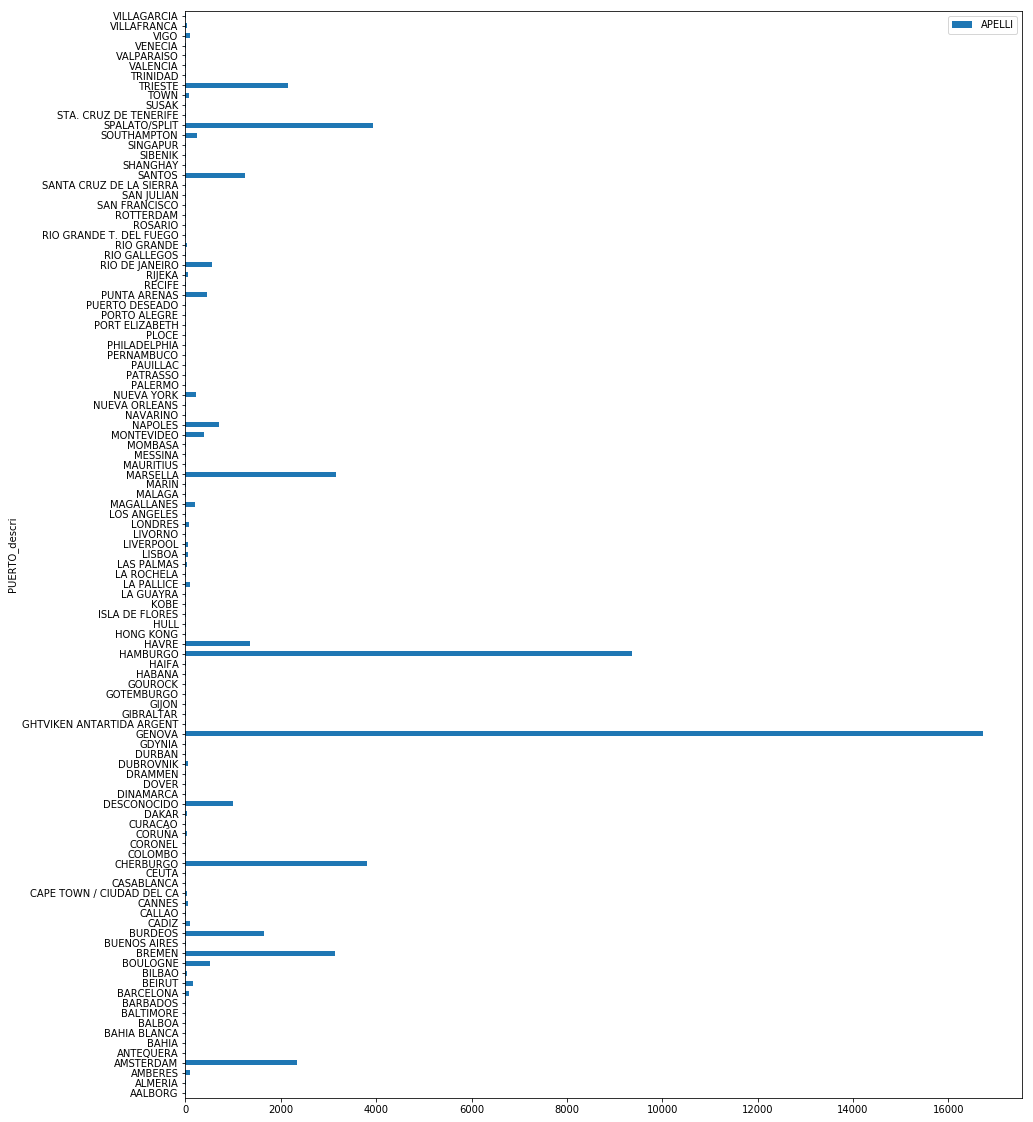

In [32]:
migrantes[['PUERTO_descri','APELLI']].groupby('PUERTO_descri').count().plot.barh(figsize=(15,20))

## Criterios de agrupamiento para palestinos

* Profesion
* Sexo
* Instrucción
* Religión
* Edades y promedio
* Estado civil
* Buques
* Puerto de partida 
* Puerto de llegada